### The mathematical building blocks of neural networks

#### A first look at a neural network
##### Loading the MNIST dataset in Keras

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

The images are encoded as NumPy arrays, and the labels are an array of digits, ranging
from 0 to 9. The images and labels have a one-to-one correspondence. <br>
Let’s look at the training data:

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

And here’s the test data:

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

The workflow will be as follows: 
- First, we’ll feed the neural network the training data, train_images and train_labels. 
- The network will then learn to associate images and labels. 
- Finally, we’ll ask the network to produce predictions for test_images, and we’ll
verify whether these predictions match the labels from test_labels.

#### The network architecture

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

The core building block of neural networks is the **layer**. You can think of a layer as a filter for data: some data goes in, and it comes out in a more useful form. Specifically, layers extract representations out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation. <br>
A deep learning model is like a sieve for data processing, made of a succession of
increasingly refined data filters—the layers.

Here, our model consists of a sequence of two **Dense layers**, which are densely connected (also called fully connected) neural layers. <br>
The second (and last) layer is a **10-way softmax classification layer**, which means it will **return an array of 10 probability scores (summing to 1).** <br>
Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make the model ready for training, we need to pick three more things as part of the **compilation step**:
- An **optimizer**
  - The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance.
- A **loss function**
  - How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
- **Metrics to monitor during training and testing**
  - Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

#### The compilation step

In [9]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Before training, we’ll preprocess the data by reshaping it into the shape the model expects and scaling it so that all values are in the [0, 1] interval. <br>
Previously, our training images were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. <br>
We’ll transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

#### Preparing the image data

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

We’re now ready to train the model, which in Keras is done via a call to the model’s
**fit() method**—we fit the model to its training data.

#### "Fitting" the model

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2563 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1038 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0680 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0498 - accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0374 - accuracy: 0.9887


Two quantities are displayed during training: the loss of the model over the training data, and the accuracy of the model over the training data. We quickly reach an accuracy of 0.989 (98.9%) on the training data. <br>
Now that we have a trained model, we can use it to predict class probabilities for new digits—images that weren’t part of the training data, like those from the test set.

#### Using the model to make predictions

In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([3.8552977e-10, 8.2131116e-12, 1.8042188e-07, 4.3027976e-05,
       1.4384079e-12, 1.4278241e-08, 4.6255135e-16, 9.9995649e-01,
       2.5502748e-08, 2.6422697e-07], dtype=float32)

Each number of index i in that array corresponds to the probability that digit image
test_digits[0] belongs to class i. <br>
This first test digit has the highest probability score (0.99997568, almost 1) at
index 7, so according to our model, it must be a 7:

In [13]:
predictions[0].argmax()

7

In [14]:
predictions[0][7]

0.9999565

We can check that the test label agrees:

In [15]:
test_labels[0]

7

On average, how good is our model at classifying such never-before-seen digits? <br>
Let’s check by computing average accuracy over the entire test set.

#### Evaluating the model on new data

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {round(test_acc, 4)}")

313/313 [==============================] - 1s 1ms/step - loss: 0.0679 - accuracy: 0.9793
Test accuracy: 0.9793


This concludes our first example.

The test-set accuracy turns out to be 98.05%—that’s quite a bit lower than the training set accuracy (98.94%). This gap between training accuracy and test accuracy is an example of overfitting: the fact that machine learning models tend to perform worse on new data than on their training data.

### Data representations for neural networks
In the previous example, we started from data stored in multidimensional NumPy arrays, also called tensors. In general, all current machine learning systems use tensors as their basic data structure. <br>
Tensors are fundamental to the field—so fundamental that TensorFlow was named after them. <br>
So what’s a tensor?<br>
**At its core, a tensor is a container for data—usually numerical data. So, it’s a container for numbers.** <br>
You may be already familiar with **matrices, which are rank-2 tensors**: **tensors are a generalization of matrices to an arbitrary number of dimensions (note that in the context of tensors, a dimension is often called an axis).**

#### Scalars (rank-0 tensors)
- **A tensor that contains only one number is called a *scalar*** (or scalar tensor, or rank-0 tensor, or 0D tensor). 
- **In NumPy, a float32 or float64 number is a scalar tensor (or scalar array).**
- You can display the number of axes of a NumPy tensor via the **ndim** attribute; **a scalar tensor has 0 axes (ndim == 0).** 
- **The number of axes of a tensor is also called its *rank***. 

Here’s a NumPy scalar:

In [17]:
import numpy as np
x = np.array(12)
x

array(12)

In [18]:
x.ndim

0

#### Vectors (rank-1 tensors)
- **An array of numbers is called a vector**, or rank-1 tensor, or 1D tensor. 
- **A rank-1 tensor is said to have exactly one axis.**

Following is a NumPy vector:

In [19]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

- This vector has five entries and so is called **a 5-dimensional vector**.
- Don’t confuse a 5D vector with a 5D tensor! 
  - **A 5D vector has only one axis and has five dimensions along its axis**, 
  - whereas **a 5D tensor has five axes (and may have any number of dimensions along each axis).**
- Dimensionality can denote either the number of entries along a specific axis (as in the case of our 5D vector) or the number of axes in a tensor (such as a 5D tensor), which can be confusing at times. 
- In the latter case, it’s technically more correct to talk about a tensor of rank 5 (the rank of a tensor being the number of axes), but the ambiguous notation 5D tensor is common regardless.

#### Matrices (rank-2 tensors)
- **An array of vectors is a matrix**, or rank-2 tensor, or 2D tensor. 
- **A matrix has two axes (often referred to as rows and columns).** 
- You can visually interpret a matrix as a rectangular grid of numbers. 

This is a NumPy matrix:

In [21]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

The entries from the first axis are called the rows, and the entries from the second axis are called the columns. <br>
In the previous example, [5, 78, 2, 34, 0] is the first row of x, and [5, 6, 7] is the first column.

#### Rank-3 and higher-rank tensors
- **If you pack such matrices in a new array, you obtain a rank-3 tensor (or 3D tensor)**, which you can visually interpret as a cube of numbers. 

Following is a NumPy rank-3 tensor:

In [22]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

By packing rank-3 tensors in an array, you can create a rank-4 tensor, and so on. <br>
In deep learning, you’ll generally manipulate tensors with ranks 0 to 4, although you may go up to 5 if you process video data.

#### Key attributes
A tensor is defined by three key attributes:
- **Number of axes (rank)**—For instance, a rank-3 tensor has three axes, and a matrix has two axes. This is also called the tensor’s **ndim** in Python libraries such as NumPy or TensorFlow.
- **Shape**—This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous **matrix** example has shape (3, 5), and the **rank-3 tensor** example has shape (3, 3, 5). A **vector** has a shape with a single element, such as (5,), whereas a **scalar** has an empty shape, ().
- **Data type (usually called dtype in Python libraries)**—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float16, float32, float64, uint8, and so on. In TensorFlow, you are also likely to come across string tensors.

To make this more concrete, let’s look back at the data we processed in the MNIST
example. <br>
First, we load the MNIST dataset:

In [23]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Next, we display the number of axes of the tensor train_images, the **ndim** attribute:

In [24]:
train_images.ndim

3

Here’s its shape:

In [25]:
train_images.shape

(60000, 28, 28)

And this is its data type, the **dtype** attribute:

In [26]:
train_images.dtype

dtype('uint8')

So what we have here is a rank-3 tensor of 8-bit integers. <br>
More precisely, it’s an array of 60,000 matrices of 28 × 28 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255. <br>
Let’s display the fourth digit in this rank-3 tensor, using the Matplotlib library.

##### Displaying the fourth digit

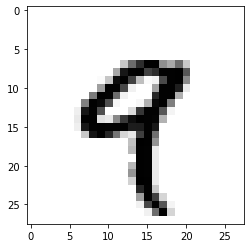

In [27]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Naturally, the corresponding label is the integer 9:

In [28]:
train_labels[4]

9

#### Manipulating tensors in NumPy
In the previous example, we selected a specific digit alongside the first axis using the syntax train_images[i]. <br>
Selecting specific elements in a tensor is called **tensor slicing**.

Let’s look at the tensor-slicing operations you can do on NumPy arrays. <br>
The following example selects digits #10 to #100 (#100 isn’t included) and puts them in an array of shape (90, 28, 28):

In [29]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

It’s equivalent to this more detailed notation, which specifies a start index and stop index for the slice along each tensor axis. <br>
Note that **: is equivalent to selecting the entire axis:**

In [30]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [31]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In general, you may select slices between any two indices along each tensor axis. For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you would do this:

In [32]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

It’s also possible to use negative indices. Much like negative indices in Python lists, they indicate a position relative to the end of the current axis. <br>
In order to crop the images to patches of 14 × 14 pixels centered in the middle, you’d do this:

In [33]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

#### The notion of data batches
- In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll come across in deep learning will be the **samples axis** (sometimes called the **samples dimension**). 
- In the MNIST example, “samples” are images of digits.
- In addition, deep learning models don’t process an entire dataset at once; rather, they break the data into small batches. 
- Concretely, here’s one batch of our MNIST digits, with a batch size of 128:

In [34]:
batch = train_images[:128]

And here’s the next batch:

In [35]:
batch = train_images[128:256]

And the *nth* batch:

In [36]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

- When considering such a batch tensor, the first axis (axis 0) is called the **batch axis** or **batch dimension**. 
- This is a term you’ll frequently encounter when using Keras and other deep learning libraries.

#### Real-world examples of data tensors
Let’s make data tensors more concrete with a few examples similar to what you’ll encounter later. 
The data you’ll manipulate will almost always fall into one of the following categories:
- **Vector data**—Rank-2 tensors of shape (samples, features), where each sample is a vector of numerical attributes (“features”)
- **Timeseries data or sequence data**—Rank-3 tensors of shape (samples, timesteps, features), where each sample is a sequence (of length timesteps) of feature vectors
- **Images**—Rank-4 tensors of shape (samples, height, width, channels), where each sample is a 2D grid of pixels, and each pixel is represented by a vector of values (“channels”)
- **Video**—Rank-5 tensors of shape (samples, frames, height, width, channels),
where each sample is a sequence (of length frames) of images

##### Vector data
This is one of the most common cases. In such a dataset, each single data point can be encoded as a vector, and thus a batch of data will be encoded as a rank-2 tensor (that is, an array of vectors), where **the first axis is the samples axis** and **the second axis is the features axis.**

Let’s take a look at two examples:
- An actuarial dataset of people, where we consider each person’s age, gender, and income. Each person can be characterized as a vector of 3 values, and thus an entire dataset of 100,000 people can be stored in a rank-2 tensor of shape (100000, 3).
- A dataset of text documents, where we represent each document by the counts of how many times each word appears in it (out of a dictionary of 20,000 common words). Each document can be encoded as a vector of 20,000 values (one count per word in the dictionary), and thus an entire dataset of 500 documents can be stored in a tensor of shape (500, 20000).

##### Timeseries data or sequence data
Whenever time matters in your data (or the notion of sequence order), it makes sense to store it in a rank-3 tensor with an explicit time axis. Each sample can be encoded as a sequence of vectors (a rank-2 tensor), and thus a batch of data will be encoded as a rank-3 tensor. <br>
**The time axis is always the second axis (axis of index 1) by convention.** <br>
Let’s look at a few examples:
- A dataset of stock prices. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus, every minute is encoded as a 3D vector, an entire day of trading is encoded as a matrix of shape (390, 3) (there are 390 minutes in a trading day), and 250 days worth of data can be stored in a rank-3 tensor of shape (250, 390, 3). Here, each sample would be one days worth of data.
- A dataset of tweets, where we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a rank-2 tensor of shape (280, 128), and a dataset of 1 million tweets can be stored in a tensor of shape (1000000, 280, 128).

##### Image data
Images typically have three dimensions: **height, width, and color depth**. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in rank-2 tensors, by convention image tensors are always rank-3, with a one-dimensional color channel for grayscale images. A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3).
- There are two conventions for shapes of image tensors: **the channels-last convention** (which is standard in TensorFlow) and **the channels-first convention** (which is increasingly falling out of favor).
- **The channels-last convention places the color-depth axis at the end:** (samples, height, width, color_depth). 
- Meanwhile, **the channels-first convention places the color depth axis right after the batch axis:** (samples, color_depth, height, width). 
- With the channels-first convention, the previous examples would become (128, 1, 256, 256) and (128, 3, 256, 256). 

The Keras API provides support for both formats.

##### Video data
Video data is one of the few types of real-world data for which you’ll need **rank-5 tensors.** <br>
A video can be understood as a sequence of frames, each frame being a color image. Because each frame can be stored in a rank-3 tensor (height, width, color_depth), a sequence of frames can be stored in a rank-4 tensor (frames, height, width, color_depth), and thus a batch of different videos can be stored in a rank-5 tensor of shape (samples, frames, height, width, color_depth). <br>
For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per second would have 240 frames. A batch of four such video clips would be stored in a tensor of shape (4, 240, 144, 256, 3). That’s a total of 106,168,320 values! If the dtype of the tensor was float32, each value would be stored in 32 bits, so the tensor would represent 405 MB. Heavy! Videos you encounter in real life are much lighter, because they aren’t stored in float32, and they’re typically compressed by a large factor (such as in the MPEG format).

#### The gears of neural networks: Tensor operations
Much as any computer program can be ultimately reduced to a small set of binary operations on binary inputs (AND, OR, NOR, and so on), all transformations learned by deep neural networks can be reduced to a handful of tensor operations (or tensor functions) applied to tensors of numeric data. For instance, it’s possible to add tensors, multiply tensors, and so on. <br>
In our initial example, we built our model by stacking Dense layers on top of each other. <br>
A Keras layer instance looks like this:
```python
keras.layers.Dense(512, activation="relu")
```
This layer can be interpreted as a function, which takes as input a matrix and returns another matrix—a new representation for the input tensor. Specifically, the function is as follows (where W is a matrix and b is a vector, both attributes of the layer): 
```python
output = relu(dot(input, W) + b)
```
Let’s unpack this. We have three tensor operations here:
- A dot product (dot) between the input tensor and a tensor named W
- An addition (+) between the resulting matrix and a vector b
- A relu operation: relu(x) is max(x, 0); “relu” stands for “rectified linear unit”

##### Element-wise operations
The relu operation and addition are element-wise operations: operations that are applied independently to each entry in the tensors being considered. This means these operations are highly amenable to massively parallel implementations (vectorized implementations, a term that comes from the vector processor supercomputer architecture from the 1970–90 period). <br>
If you want to write a naive Python implementation of an element-wise operation, you use a for loop, as in this naive implementation of an element-wise relu operation:

In [37]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

You could do the same for addition:

In [38]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

On the same principle, you can do element-wise multiplication, subtraction, and so on.
In practice, when dealing with NumPy arrays, these operations are available as well optimized built-in NumPy functions, which themselves delegate the heavy lifting to a Basic Linear Algebra Subprograms (BLAS) implementation. <br>
BLAS are low-level, highly parallel, efficient tensor-manipulation routines that are typically implemented in Fortran or C.
So, in NumPy, you can do the following element-wise operation, and it will be blazing fast:

In [39]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


This takes 0.01 s. Meanwhile, the naive version takes a stunning 2.28 s:

In [40]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.28 s


Likewise, when running TensorFlow code on a GPU, element-wise operations are executed via fully vectorized CUDA implementations that can best utilize the highly parallel GPU chip architecture.

##### Broadcasting
Our earlier naive implementation of naive_add only supports the addition of rank-2 tensors with identical shapes. But in the Dense layer introduced earlier, we added a rank-2 tensor with a vector. <br>
What happens with addition when the shapes of the two tensors being added differ? <br>
When possible, and if there’s no ambiguity, the smaller tensor will be broadcast to match the shape of the larger tensor. Broadcasting consists of two steps:
- Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.
- The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

Let’s look at a concrete example. Consider X with shape (32, 10) and y with shape (10,):

In [41]:
import numpy as np

X = np.random.random((32, 10))
y = np.random.random((10,))

First, we add an empty first axis to y, whose shape becomes (1, 10):

In [42]:
y = np.expand_dims(y, axis=0)

Then, we repeat y 32 times alongside this new axis, so that we end up with a tensor Y with shape (32, 10), where Y[i, :] == y for i in range(0, 32):

In [43]:
Y = np.concatenate([y] * 32, axis=0)

At this point, we can proceed to add X and Y, because they have the same shape. <br>
In terms of implementation, no new rank-2 tensor is created, because that would be terribly inefficient. The repetition operation is entirely virtual: it happens at the algorithmic level rather than at the memory level. But thinking of the vector being repeated 10 times alongside a new axis is a helpful mental model. Here’s what a naive implementation would look like:

In [44]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

With broadcasting, you can generally perform element-wise operations that take two inputs tensors if one tensor has shape (a, b, … n, n + 1, … m) and the other has shape (n, n + 1, … m). The broadcasting will then automatically happen for axes a through n - 1. <br>
The following example applies the element-wise maximum operation to two tensors of different shapes via broadcasting:

In [46]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

##### Tensor product
The tensor product, or dot product (not to be confused with an element-wise product, the * operator), is one of the most common, most useful tensor operations. <br>
In NumPy, a tensor product is done using the np.dot function (because the mathematical notation for tensor product is usually a dot):

In [47]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

Mathematically, what does the dot operation do? <br>
Let’s start with the dot product of two vectors, x and y. <br>
It’s computed as follows:

In [48]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

You’ll have noticed that the dot product between two vectors is a **scalar** and that only vectors with the same number of elements are compatible for a dot product. <br>
You can also take the dot product between a **matrix** x and a vector y, which returns a vector where the coefficients are the dot products between y and the rows of x. 

You implement it as follows:

In [49]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

You could also reuse the code we wrote previously, which highlights the relationship between a matrix-vector product and a vector product:

In [50]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

Note that as soon as one of the two tensors has an ndim greater than 1, dot is no longer symmetric, which is to say that dot(x, y) isn’t the same as dot(y, x). <br>
Of course, a dot product generalizes to tensors with an arbitrary number of axes. <br>
- The most common applications may be the dot product between two matrices. 
- You can take the dot product of two matrices x and y (dot(x, y)) if and only if x shape[1] == y.shape[0]. 
- The result is a matrix with shape (x.shape[0], y.shape[1]), where the coefficients are the vector products between the rows of x and the columns of y.

Here’s the naive implementation:

In [51]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

##### Tensor reshaping
A third type of tensor operation that’s essential to understand is tensor reshaping.
Although it wasn’t used in the Dense layers in our first neural network example, we used it when we preprocessed the digits data before feeding it into our model:

In [52]:
train_images = train_images.reshape((60000, 28 * 28))

Reshaping a tensor means rearranging its rows and columns to match a target shape.<br>
Naturally, the reshaped tensor has the same total number of coefficients as the initial tensor. <br>
Reshaping is best understood via simple examples:

In [57]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [54]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [55]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

A special case of reshaping that’s commonly encountered is **transposition**. <br>
Transposing a matrix means exchanging its rows and its columns, so that x[i, :] becomes x[:, i]:

In [58]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

##### THE GRADIENT TAPE IN TENSORFLOW
- The API through which you can leverage TensorFlow’s powerful automatic differentiation capabilities is the GradientTape. 
- It’s a Python scope that will “record” the tensor operations that run inside it, in the form of a computation graph (sometimes called a “tape”). 
- This graph can then be used to retrieve the gradient of any output with respect to any variable or set of variables (instances of the tf.Variable class). 
- A tf.Variable is a specific kind of tensor meant to hold mutable state—for instance, **the weights of a neural network are always tf.Variable instances.**

In [60]:
import tensorflow as tf

x = tf.Variable(0.) # Instantiate a scalar Variable with an initial value of 0.
with tf.GradientTape() as tape: # Open a GradientTape scope.
    y = 2 * x + 3 # Inside the scope, apply some tensor operations to our variable.
grad_of_y_wrt_x = tape.gradient(y, x) # Use the tape to retrieve the gradient of the output y with respect to our variable x.

The GradientTape works with tensor operations:

In [61]:
x = tf.Variable(tf.random.uniform((2, 2))) # Instantiate a Variable with shape (2, 2) and an initial value of all zeros.
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
# grad_of_y_wrt_x is a tensor of shape (2, 2) (like x) describing the curvature of y = 2 * a + 3 around x = [[0, 0], [0, 0]].

It also works with lists of variables:

In [62]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b # matmul is how you say “dot product” in TensorFlow.
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
# grad_of_y_wrt_W_and_b is a list of two tensors with the same shapes as W and b, respectively.

#### Looking back at our first example
Let’s go back to the first example in this chapter and review each piece of it in the light of what you’ve learned since.

This was the input data:

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

Now you understand that the input images are stored in NumPy tensors, which are here formatted as float32 tensors of shape (60000, 784) (training data) and (10000, 784) (test data) respectively.

This was our model:

In [63]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Now you understand that this model consists of a chain of two Dense layers, that each layer applies a few simple tensor operations to the input data, and that these operations involve weight tensors. <br>
Weight tensors, which are attributes of the layers, are where the knowledge of the model persists.

This was the model-compilation step:

In [64]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Now you understand that sparse_categorical_crossentropy is the loss function that’s used as a feedback signal for learning the weight tensors, and which the training phase will attempt to minimize. You also know that this reduction of the loss happens via mini-batch stochastic gradient descent. <br>
The exact rules governing a specific use of gradient descent are defined by the rmsprop optimizer passed as the first argument.

Finally, this was the training loop:

In [65]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 5.5606 - accuracy: 0.9003
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.6614 - accuracy: 0.9533
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4800 - accuracy: 0.9639
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3976 - accuracy: 0.9722
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3426 - accuracy: 0.9769


- Now you understand what happens when you call fit: the model will start to iterate on the training data in mini-batches of 128 samples, 5 times over (each iteration over all the training data is called an epoch). 
- For each batch, the model will compute the gradient of the loss with regard to the weights (using the Backpropagation algorithm, which derives from the chain rule in calculus) and move the weights in the direction that will reduce the value of the loss for this batch.
- After these 5 epochs, the model will have performed 2,345 gradient updates (469 per epoch), and the loss of the model will be sufficiently low that the model will be capable of classifying handwritten digits with high accuracy.

At this point, you already know most of what there is to know about neural networks.<br>
Let’s prove it by reimplementing a simplified version of that first example “from scratch” in TensorFlow, step by step.

#### Reimplementing our first example from scratch in TensorFlow

##### A simple Dense class

In [66]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

##### A SIMPLE SEQUENTIAL CLASS

In [67]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

Using this NaiveDense class and this NaiveSequential class, we can create a mock
Keras model:

In [68]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

##### A BATCH GENERATOR
Next, we need a way to iterate over the MNIST data in mini-batches. <br>
This is easy:

In [69]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

##### Running one training step
The most difficult part of the process is the “training step”: updating the weights of the model after running it on one batch of data. We need to
- Compute the predictions of the model for the images in the batch.
- Compute the loss value for these predictions, given the actual labels.
- Compute the gradient of the loss with regard to the model’s weights.
- Move the weights by a small amount in the direction opposite to the gradient.

In [70]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

As you already know, the purpose of the “weight update” step (represented by the preceding update_weights function) is to move the weights by “a bit” in a direction that will reduce the loss on this batch. <br>
The magnitude of the move is determined by the “learning rate,” typically a small quantity. The simplest way to implement this update_weights function is to subtract gradient * learning_rate from each weight:

In [71]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In practice, you would almost never implement a weight update step like this by hand.
Instead, you would use an Optimizer instance from Keras, like this:

In [72]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

Now that our per-batch training step is ready, we can move on to implementing an entire epoch of training.

##### The full training loop
An epoch of training simply consists of repeating the training step for each batch in the training data, and the full training loop is simply the repetition of one epoch:

In [73]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

Let’s test drive it:

In [74]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 4.90
loss at batch 100: 2.23
loss at batch 200: 2.18
loss at batch 300: 2.08
loss at batch 400: 2.20
Epoch 1
loss at batch 0: 1.89
loss at batch 100: 1.88
loss at batch 200: 1.80
loss at batch 300: 1.70
loss at batch 400: 1.81
Epoch 2
loss at batch 0: 1.57
loss at batch 100: 1.58
loss at batch 200: 1.48
loss at batch 300: 1.42
loss at batch 400: 1.50
Epoch 3
loss at batch 0: 1.31
loss at batch 100: 1.34
loss at batch 200: 1.22
loss at batch 300: 1.20
loss at batch 400: 1.27
Epoch 4
loss at batch 0: 1.11
loss at batch 100: 1.16
loss at batch 200: 1.03
loss at batch 300: 1.04
loss at batch 400: 1.10
Epoch 5
loss at batch 0: 0.97
loss at batch 100: 1.02
loss at batch 200: 0.89
loss at batch 300: 0.92
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.86
loss at batch 100: 0.91
loss at batch 200: 0.79
loss at batch 300: 0.83
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.78
loss at batch 100: 0.83
loss at batch 200: 0.71
loss at batch 300: 0.76
loss at batch 40

#### Evaluating the model
We can evaluate the model by taking the argmax of its predictions over the test images, and comparing it to the expected labels:

In [75]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81


All done! As you can see, it’s quite a bit of work to do “by hand” what you can do in a few lines of Keras code. But because you’ve gone through these steps, you should now have a crystal clear understanding of what goes on inside a neural network when you call fit(). Having this low-level mental model of what your code is doing behind the scenes will make you better able to leverage the high-level features of the Keras API.

#### Summary
- Tensors form the foundation of modern machine learning systems. They come in various flavors of dtype, rank, and shape.
- You can manipulate numerical tensors via tensor operations (such as addition, tensor product, or element-wise multiplication), which can be interpreted as encoding geometric transformations. In general, everything in deep learning is amenable to a geometric interpretation.
- Deep learning models consist of chains of simple tensor operations, parameterized by weights, which are themselves tensors. The weights of a model are where its “knowledge” is stored.
- Learning means finding a set of values for the model’s weights that minimizes a loss function for a given set of training data samples and their corresponding targets.
- Learning happens by drawing random batches of data samples and their targets, and computing the gradient of the model parameters with respect to the loss on the batch. The model parameters are then moved a bit (the magnitude of the move is defined by the learning rate) in the opposite direction from the gradient. This is called mini-batch stochastic gradient descent.
- The entire learning process is made possible by the fact that all tensor operations in neural networks are differentiable, and thus it’s possible to apply the chain rule of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value. This is called **backpropagation**.
- Two key concepts you’ll see frequently in future chapters are **loss** and **optimizers**. These are the two things you need to define before you begin feeding data into a model.
  - The **loss** is the quantity you’ll attempt to minimize during training, so it should represent a measure of success for the task you’re trying to solve.
  - The **optimizer** specifies the exact way in which the gradient of the loss will be used to update parameters: for instance, it could be the RMSProp optimizer, SGD with momentum, and so on.